# **Final project**

## **UCI Bank Marketing Data Set**

I chose to work with UCI's Bank Marketing dataset. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Here are the variables of the dataset:<br>
Bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

Related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Social and economic context attributes:
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric) 
- cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

I chose to work with this dataset because it offers a practical application of the knowledge and skills I have gained throughout this course, enabling me to apply them in real-life scenarios. Indeed, the application of machine learning techniques to make predictions about customer behavior is becoming increasingly essential in today's business industry. Companies use customer data to build predictive models that can help them understand consumer behavior patterns and anticipate future trends. These models can provide valuable insights into how to improve customer engagement, optimize marketing strategies, and ultimately increase revenue. The UCI bank marketing dataset contains information about customer demographics, personal finance, and contact history, which makes it an excellent resource for developing predictive models. The dataset's primary objective is to identify the customers who are most likely to subscribe to the bank's term deposit product. By analyzing customer behavior patterns and understanding what factors influence their decisions, we can build a predictive model that can help us identify potential customers for the bank's product.

Dataset description: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing <br>
Download the dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

## **Preliminary inspection of the data**

In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('sample_data/bank-additional-full.csv', sep=';')
data2 = pd.read_csv('sample_data/bank-additional.csv', sep=';')

In [11]:
pd.set_option('display.max_columns', None)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
data.shape

(41188, 21)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [15]:
#Let's look at the number of unique values for job and education columns

job_count = data['job'].unique().size
print("JOB unique values count : "+ str(job_count))

ed_count = data['education'].unique().size
print("EDUCATION unique values count : "+ str(ed_count))

JOB unique values count : 12
EDUCATION unique values count : 8


## **Cleaning and formatting of the data**

In [16]:
#Check number of null values in training data

data.isnull().sum().sum()

0

In [17]:
#Check number of null values in testing data

data2.isnull().sum().sum()

0

In [18]:
#Check min and max values for age

ymin = data['age'].min()
ymax = data['age'].max()
print("Minimun age is : "+ str(ymin), " Maximum age is : "+str(ymax))

Minimun age is : 17  Maximum age is : 98


In [19]:
#Replace categorical variables by numeric

data['job'].replace(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0], inplace=True)

data['marital'].replace(['divorced','married','single','unknown'],
                        [1, 2, 3, 0], inplace=True)

data['education'].replace(['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'],
                        [1, 2, 3, 4, 5, 6, 7, 0], inplace=True)

data['default'].replace(['no','yes','unknown'],
                        [2, 1, 0], inplace=True)

data['housing'].replace(['no','yes','unknown'],
                        [2, 1, 0], inplace=True)

data['loan'].replace(['no','yes','unknown'],
                        [2, 1, 0], inplace=True)

data['contact'].replace(['cellular','telephone'],
                        [0, 1], inplace=True)

data['month'].replace(['jan','feb','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

data['day_of_week'].replace(['mon','tue','wed','thu','fri'],
                        [1, 2, 3, 4, 5], inplace=True)

data['poutcome'].replace(['failure','nonexistent','success'],
                        [2, 0, 1], inplace=True)

data['y'].replace(['no','yes'],
                        [2, 1], inplace=True)

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,2,1,2,2,2,1,5,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,2
1,57,8,2,4,0,2,2,1,5,1,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,2
2,37,8,2,4,2,1,2,1,5,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,2
3,40,1,2,2,2,2,2,1,5,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,2
4,56,8,2,4,2,2,1,1,5,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,2


In [20]:
#Let's do the same thing for our testing dataset

data2['job'].replace(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0], inplace=True)

data2['marital'].replace(['divorced','married','single','unknown'],
                        [1, 2, 3, 0], inplace=True)

data2['education'].replace(['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'],
                        [1, 2, 3, 4, 5, 6, 7, 0], inplace=True)

data2['default'].replace(['no','yes','unknown'],
                        [2, 1, 0], inplace=True)

data2['housing'].replace(['no','yes','unknown'],
                        [2, 1, 0], inplace=True)

data2['loan'].replace(['no','yes','unknown'],
                        [2, 1, 0], inplace=True)

data2['contact'].replace(['cellular','telephone'],
                        [0, 1], inplace=True)

data2['month'].replace(['jan','feb','mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

data2['day_of_week'].replace(['mon','tue','wed','thu','fri'],
                        [1, 2, 3, 4, 5], inplace=True)

data2['poutcome'].replace(['failure','nonexistent','success'],
                        [2, 0, 1], inplace=True)

data2['y'].replace(['no','yes'],
                        [2, 1], inplace=True)

In this section, we:
- Checked for null values &rarr; no null values detected
- Checked for the coherence of age values &rarr; values look coherent
- Changed the categorical variables into numeric &rarr; it will allow us to check for correlation between the different variables and our target 'y'.

Now, here are the following values in our dataframe:
 - Job:
    - 0 = unknown
    - 1 = admin
    - 2 = blue-collar
    - 3 = entrepreneur
    - 4 = housemaid
    - 5 = management
    - 6 = retired
    - 7 = self-employed
    - 8 = services
    - 9 = student
    - 10 = technician
    - 11 = unemployed 
 - Marital:
    - 0 = unknown
    - 1 = divorced
    - 2 = married
    - 3 = single
- Education:
    - 0 = unknown
    - 1 = basic.4y
    - 2 = basic.6y
    - 3 = basic.9y
    - 4 = high.school
    - 5 = illiterate
    - 6 = professional.course
    - 7 = university.degree
 - Default:
    - 0 = unknown
    - 1 = yes
    - 2 = no
 - Housing:
    - 0 = unknown
    - 1 = yes
    - 2 = no  
 - Loan:
    - 0 = unknown
    - 1 = yes
    - 2 = no
 - Contact:
    - 0 = cellular
    - 1 = telephone
 - Month:
    - 1 = jan
    - 2 = feb
    - 3 = mar
    - 4 = apr
    - 5 = may
    - 6 = jun
    - 7 = jul
    - 8 = aug
    - 9 = sep
    - 10 = oct
    - 11 = nov
    - 12 = dec
 - Day of the week:
    - 1 = mon
    - 2 = tue
    - 3 = wed
    - 4 = thu
    - 5 = fri
 - Poutcome:
    - 0 = nonexistant
    - 1 = success
    - 2 = failure
 - Y:
    - 1 = yes
    - 2 = no

## **Overview statistics and plotting**

In [21]:
#Proportions of 'Yes' and 'No' in 'Y'

value_counts = data['y'].value_counts()

percentage_1 = value_counts[1] / len(data) * 100
percentage_2 = value_counts[2] / len(data) * 100

print("Percentage of 'Yes': {:.2f}%".format(percentage_1))
print("Percentage of 'No': {:.2f}%".format(percentage_2))

Percentage of 'Yes': 11.27%
Percentage of 'No': 88.73%


In [22]:
#Proportions of 'Yes' and 'No' in 'Y' in data2

value_counts = data2['y'].value_counts()

percentage_1 = value_counts[1] / len(data2) * 100
percentage_2 = value_counts[2] / len(data2) * 100

print("Percentage of 'Yes': {:.2f}%".format(percentage_1))
print("Percentage of 'No': {:.2f}%".format(percentage_2))

Percentage of 'Yes': 10.95%
Percentage of 'No': 89.05%


In [ ]:
# Correlation matrix

data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.013098,-0.388687,-0.163277,-0.165019,0.001923,0.006397,0.007021,0.077265,-0.018486,-0.000866,0.004594,-0.034369,0.024365,0.007781,-0.000371,0.000857,0.129372,0.010767,-0.017725,-0.030399
job,-0.013098,1.000000,0.024921,0.124381,0.045744,-0.007318,0.008494,-0.032433,0.048099,-0.000471,-0.004616,-0.007781,-0.025320,0.022180,0.012002,-0.013100,-0.022865,0.043337,-0.013064,-0.021974,-0.025419
marital,-0.388687,0.024921,1.000000,0.102757,0.076919,-0.010959,-0.003955,-0.053576,-0.016981,0.014350,0.007585,-0.010060,-0.036082,0.035932,0.025318,-0.081460,-0.054981,-0.032792,-0.089356,-0.084199,-0.044538
education,-0.163277,0.124381,0.102757,1.000000,0.219635,-0.016693,-0.005085,-0.116302,0.129091,-0.002151,-0.016888,-0.001204,-0.028879,0.020945,0.012734,-0.039831,-0.099981,0.055246,-0.030550,-0.024176,-0.040025
default,-0.165019,0.045744,0.076919,0.219635,1.000000,-0.010940,0.001088,-0.135535,0.084695,0.004103,0.011642,-0.032967,-0.080064,0.102574,0.092935,-0.203263,-0.168288,-0.026399,-0.195305,-0.189789,-0.099324
housing,0.001923,-0.007318,-0.010959,-0.016693,-0.010940,1.000000,0.289759,0.065393,-0.023968,0.007088,0.009050,0.010190,0.008741,-0.021002,-0.023398,0.053458,0.066337,0.027737,0.052739,0.042281,0.009552
loan,0.006397,0.008494,-0.003955,-0.005085,0.001088,0.289759,1.000000,-0.004391,0.009307,-0.003206,0.003194,-0.003899,-0.001298,-0.000846,-0.002041,-0.003055,-0.006315,0.005895,-0.001547,-0.002464,-0.005038
contact,0.007021,-0.032433,-0.053576,-0.116302,-0.135535,0.065393,-0.004391,1.000000,-0.324315,0.019583,-0.026657,0.077368,0.117970,-0.212848,-0.234895,0.393584,0.591474,0.251614,0.399773,0.269155,0.144773
month,0.077265,0.048099,-0.016981,0.129091,0.084695,-0.023968,0.009307,-0.324315,1.000000,-0.006959,-0.019302,-0.030635,-0.079556,0.063754,0.027622,0.058874,-0.150350,0.264227,0.163411,0.132697,-0.037187
day_of_week,-0.018486,-0.000471,0.014350,-0.002151,0.004103,0.007088,-0.003206,0.019583,-0.006959,1.000000,0.010549,0.015098,0.006765,0.004013,0.009840,-0.004401,-0.004586,-0.000099,-0.005552,-0.000734,-0.010051


In [ ]:
# Correlation coefficients of each variable and y

corr_matrix = data.iloc[:,:-1].corrwith(data['y'])

print(corr_matrix)

age              -0.030399
job              -0.025419
marital          -0.044538
education        -0.040025
default          -0.099324
housing           0.009552
loan             -0.005038
contact           0.144773
month            -0.037187
day_of_week      -0.010051
duration         -0.405274
campaign          0.066357
pdays             0.324914
previous         -0.230181
poutcome         -0.122089
emp.var.rate      0.298334
cons.price.idx    0.136211
cons.conf.idx    -0.054878
euribor3m         0.307771
nr.employed       0.354678
dtype: float64


In [ ]:
# Drop 'duration' column

df = data.drop(['duration'], axis=1)
df2 = data2.drop(['duration'], axis=1)

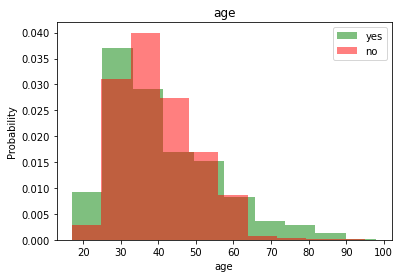

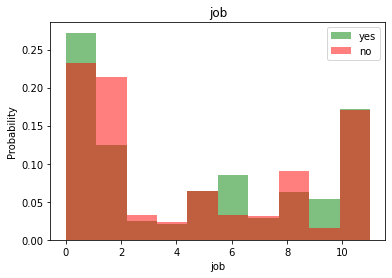

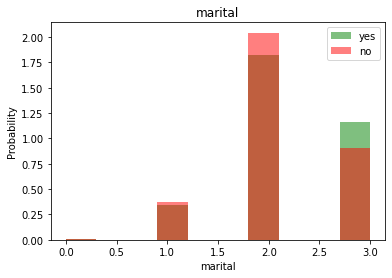

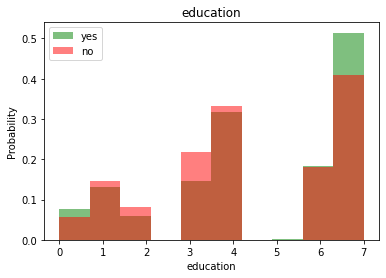

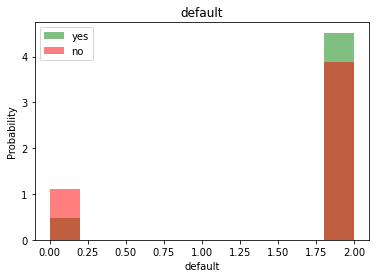

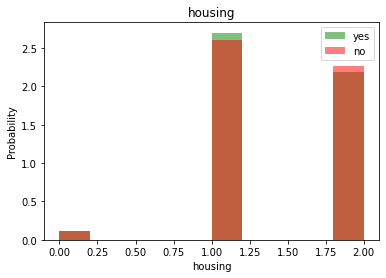

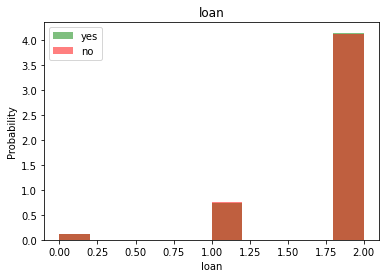

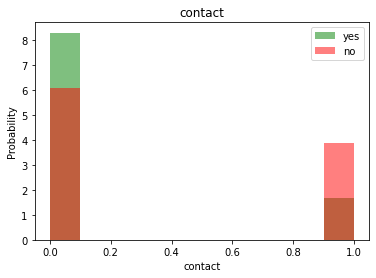

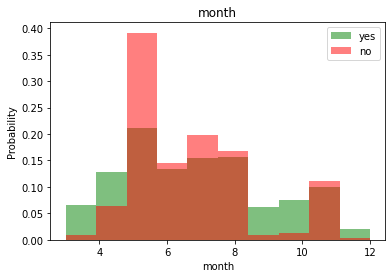

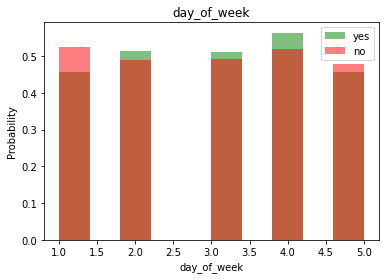

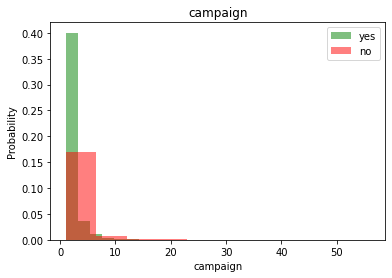

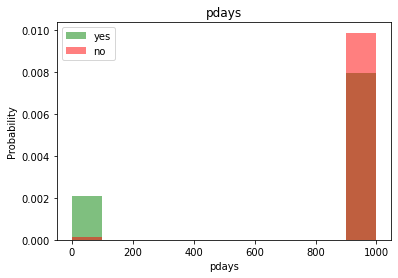

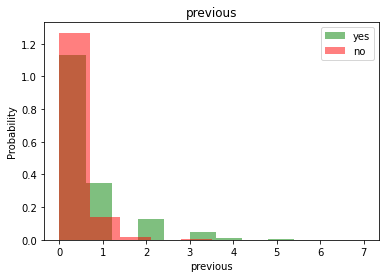

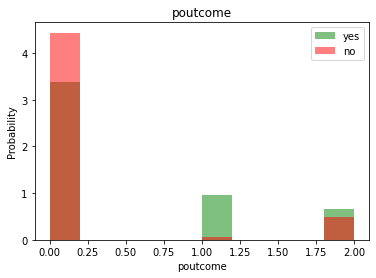

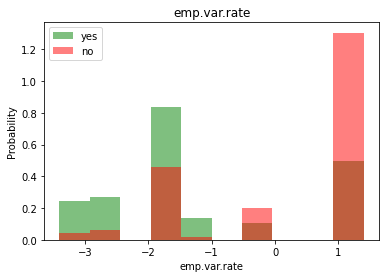

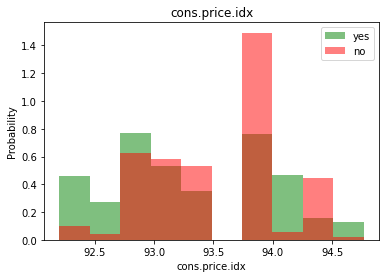

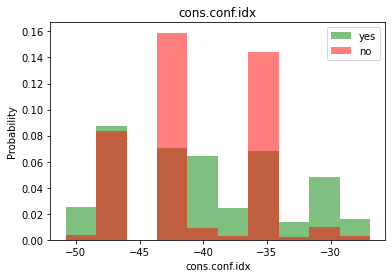

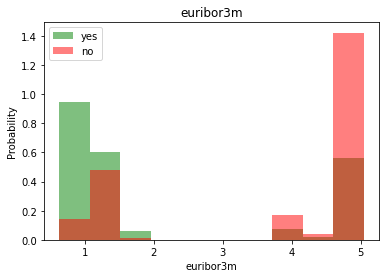

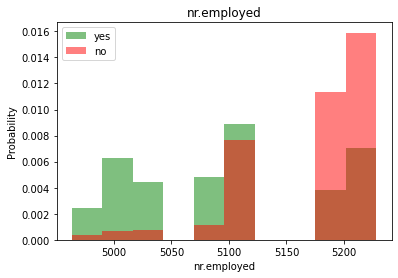

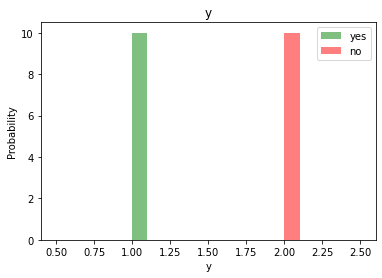

In [ ]:
import matplotlib.pyplot as plt

for label in df[:-1]:
  plt.hist(df[df["y"]==1][label], color='green', label='yes', alpha=0.5, density=True)
  plt.hist(df[df["y"]==2][label], color='red', label='no', alpha=0.5, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In this section, we removed the 'duration' column. As stated in the description of the dataset, this column should be discarded if we want to have a realistic predictive model.

We can also observe that the 5 most correlated features with 'y' are:
 - nr.employed (0.35)
 - pdays (0.32)
 - euribor3m (0.31)
 - emp.var.rate (0.3)
 - previous (-0.23)

The plots help us to understand more about these correlations. We can make the following observations:
 - People employed in companies with around 5000 employees are more likely to subscribe to a term deposit.
 - People that were contacted less than a year for a previous campaign are more likely to subscribe to a term deposit.
 - People are more likely to subscribe to a term deposit when the euribor 3 month rate is low.
 - People are more likely to subscribe to a term deposit when the employment variation rate is low.
 - People who have been contacted once or twice before this campaign are more likely to subscribe to a term deposit.

Therefore, we decided to include these variables in our training dataset. Indeed, having irrelevant or noisy features can reduce the accuracy of the model. We chose to also include these variables to our training dataset: contact (0.14), cons.price.idx (0.14), poutcome (-0.12).

## **Building the models**

In this section, we will train 3 different machine learning models to achieve the prediction objective. We will use cross validation to learn the optimum values of hyperparameters and print the accuracy, precision, and recall of each model.

We will use the following models:
 - Logistic regression
 - Random forest
 - Extreme gradient boosting

### ***Logistic regression***

In this section, we will:
 - Define our new dataframe 'df' with the selected features
 - Perform grid search cross validation
 - Print the accuracy, precision and recall of our model
 - Print the predictions of our model on our testing data 'df2'
 - Print the percentage of predicted 'yes' and 'no' 

In [ ]:
df = df[['nr.employed','pdays', 'euribor3m', 'emp.var.rate', 'previous', 'contact', 'cons.price.idx', 'poutcome', 'y']]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
X = df.drop('y', axis=1)
y = df['y'].replace({2: 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [ ]:
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 10}


In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))

Accuracy: 0.8959698956057296
Precision: 0.6344827586206897
Recall: 0.19679144385026737


In [ ]:
X_test = df2[['nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous', 'contact', 'cons.price.idx', 'poutcome']]
y_pred_test = best_model.predict(X_test)

df_pred = df2.copy()
df_pred['predicted_y'] = y_pred_test

df_pred

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,predicted_y
0,30,2,2,3,2,1,2,0,5,5,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,2,0
1,39,8,3,4,2,2,2,1,5,5,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,2,0
2,25,8,2,4,2,1,2,1,6,3,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,2,0
3,38,8,2,3,2,0,0,1,6,5,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,2,0
4,47,1,2,7,2,1,2,0,11,1,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,2,2,2,1,1,0,7,4,1,999,0,0,1.4,93.918,-42.7,4.958,5228.1,2,0
4115,39,1,2,4,2,1,2,1,7,5,1,999,0,0,1.4,93.918,-42.7,4.959,5228.1,2,0
4116,27,9,3,4,2,2,2,0,5,1,2,999,1,2,-1.8,92.893,-46.2,1.354,5099.1,2,0
4117,58,1,2,4,2,2,2,0,8,5,1,999,0,0,1.4,93.444,-36.1,4.966,5228.1,2,0


In [ ]:
value_counts = df_pred['predicted_y'].value_counts()

percentage_1 = value_counts[1] / len(df_pred) * 100
percentage_2 = value_counts[0] / len(df_pred) * 100

print("Percentage of 'Yes': {:.2f}%".format(percentage_1))
print("Percentage of 'No': {:.2f}%".format(percentage_2))

Percentage of 'Yes': 3.59%
Percentage of 'No': 96.41%


### ***Random forest***

In this section, we will:
 - Perform grid search cross validation
 - Print the accuracy, precision and recall of our model
 - Print the predictions of our model on our testing data 'df2'
 - Print the percentage of predicted 'yes' and 'no' 

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df[['nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous', 'contact', 'cons.price.idx', 'poutcome']]
y = df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 20, None],
              'max_features': ['sqrt', 'log2']}

In [ ]:
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}


In [ ]:
rfc_best = RandomForestClassifier(n_estimators=200, 
                                   max_depth=5, 
                                   max_features='log2', 
                                   random_state=42)

In [ ]:
rfc_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=200,
                       random_state=42)

In [ ]:
y_pred = rfc_best.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))

Accuracy:  0.8973051711580481
Precision:  0.6468646864686468
Recall:  0.20962566844919786


In [ ]:
X_new = df2[['nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous', 'contact', 'cons.price.idx', 'poutcome']]

y_new_pred = rfc_best.predict(X_new)

df_pred2 = df2.copy()
df_pred2['predicted_y'] = y_new_pred
df_pred2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,predicted_y
0,30,2,2,3,2,1,2,0,5,5,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,2,2
1,39,8,3,4,2,2,2,1,5,5,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,2,2
2,25,8,2,4,2,1,2,1,6,3,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,2,2
3,38,8,2,3,2,0,0,1,6,5,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,2,2
4,47,1,2,7,2,1,2,0,11,1,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,2,2,2,1,1,0,7,4,1,999,0,0,1.4,93.918,-42.7,4.958,5228.1,2,2
4115,39,1,2,4,2,1,2,1,7,5,1,999,0,0,1.4,93.918,-42.7,4.959,5228.1,2,2
4116,27,9,3,4,2,2,2,0,5,1,2,999,1,2,-1.8,92.893,-46.2,1.354,5099.1,2,2
4117,58,1,2,4,2,2,2,0,8,5,1,999,0,0,1.4,93.444,-36.1,4.966,5228.1,2,2


In [ ]:
value_counts = df_pred2['predicted_y'].value_counts()

percentage_1 = value_counts[1] / len(df_pred2) * 100
percentage_2 = value_counts[2] / len(df_pred2) * 100

print("Percentage of 'Yes': {:.2f}%".format(percentage_1))
print("Percentage of 'No': {:.2f}%".format(percentage_2))

Percentage of 'Yes': 3.62%
Percentage of 'No': 96.38%


### ***Extreme gradient boosting***

In this section, we will:
 - Perform grid search cross validation
 - Print the accuracy, precision and recall of our model
 - Print the predictions of our model on our testing data 'df2'
 - Print the percentage of predicted 'yes' and 'no' 

In [ ]:
import xgboost as xgb

In [ ]:
X = df.drop('y', axis=1)
y = df['y'].replace({2: 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [ ]:
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

In [ ]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.8979121145909201
Precision: 0.6298342541436464
Recall: 0.24385026737967913


In [ ]:
X_new = df2[['nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous', 'contact', 'cons.price.idx', 'poutcome']]

y_new_pred = xgb_model.predict(X_new)

df_pred3 = df2.copy()
df_pred3['predicted_y'] = y_new_pred
df_pred3

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,predicted_y
0,30,2,2,3,2,1,2,0,5,5,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,2,0
1,39,8,3,4,2,2,2,1,5,5,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,2,0
2,25,8,2,4,2,1,2,1,6,3,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,2,0
3,38,8,2,3,2,0,0,1,6,5,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,2,0
4,47,1,2,7,2,1,2,0,11,1,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,2,2,2,1,1,0,7,4,1,999,0,0,1.4,93.918,-42.7,4.958,5228.1,2,0
4115,39,1,2,4,2,1,2,1,7,5,1,999,0,0,1.4,93.918,-42.7,4.959,5228.1,2,0
4116,27,9,3,4,2,2,2,0,5,1,2,999,1,2,-1.8,92.893,-46.2,1.354,5099.1,2,0
4117,58,1,2,4,2,2,2,0,8,5,1,999,0,0,1.4,93.444,-36.1,4.966,5228.1,2,0


In [ ]:
value_counts = df_pred3['predicted_y'].value_counts()

percentage_1 = value_counts[1] / len(df_pred3) * 100
percentage_2 = value_counts[0] / len(df_pred3) * 100

print("Percentage of 'Yes': {:.2f}%".format(percentage_1))
print("Percentage of 'No': {:.2f}%".format(percentage_2))

Percentage of 'Yes': 4.56%
Percentage of 'No': 95.44%


## **Observations**

**Results:**<br>
***Logistic regression***<br>
Performance metrics:
 - Accuracy: 0.896
 - Precision: 0.634
 - Recall: 0.197

Predictions:
 - Percentage of clients predicted to subscribe to a term deposit: 3.59%
 - Percentage of clients predicted to not subscribe to a term deposit: 96.41%

***Random forest***<br>
Performance metrics:
 - Accuracy:  0.897
 - Precision:  0.647
 - Recall:  0.210

Predictions:
 - Percentage of clients predicted to subscribe to a term deposit: 3.62%
 - Percentage of clients predicted to not subscribe to a term deposit: 96.38%

***Extreme gradient boosting***<br>
Performance metrics: 
 - Accuracy: 0.898
 - Precision: 0.630
 - Recall: 0.244

Predictions:
 - Percentage of clients predicted to subscribe to a term deposit: 4.56%
 - Percentage of clients predicted to not subscribe to a term deposit: 95.44%

**Analysis:**<br>
The results indicate that all three models (logistic regression, random forest, and extreme gradient boosting) perform similarly in terms of accuracy, with values ranging between 0.895 and 0.898. This means that the models correctly predict the outcome of the target variable in roughly 90% of cases. However, when it comes to precision and recall, there are differences between the models. Precision is the proportion of correctly predicted positive instances (i.e., those who subscribed to a term deposit) out of all predicted positive instances. Recall is the proportion of correctly predicted positive instances out of all actual positive instances in the data. Looking at the precision values, we can see that the random forest classifier has the highest precision value of 0.647, meaning that when it predicts a positive instance, it is correct 64.7% of the time. The extreme gradient boosting model has the lowest precision value of 0.630, indicating that it is slightly less accurate than the other models when it comes to correctly predicting positive instances. When it comes to recall, we can see that the extreme gradient boosting model has the highest value of 0.244, meaning that it correctly predicts 24.4% of all positive instances in the data. The logistic regression model has the lowest recall value of 0.197, indicating that it is less effective in identifying positive instances compared to the other models. Overall, the random forest model has the highest precision, while the extreme gradient boosting model has the highest recall and accuracy. 

**Conclusion:**<br>
To conclude, all three models have relatively high accuracy scores, indicating that they are able to classify most of the observations correctly. However, the precision and recall scores are relatively low, indicating that the models are not very good at correctly identifying the positive class observations (clients who subscribed a term deposit). This might be due to class imbalance in the dataset, where there are more negative class observations (clients who did not subscribe a term deposit) than positive class observations. In such cases, models tend to predict the majority class more often, resulting in lower precision and recall scores for the positive class. We will therefore try to modify our training dataset and make the extreme gradient boosting model run on this new dataset.

## **Extreme gradient boosting model with updated dataset**

In [ ]:
yes = df.loc[df['y'] == 1] 
yes.shape[0]

4640

In [ ]:
no = df.loc[df['y'] == 2] 
no.shape[0]

36548

We will select 5,360 rows in 'no', to have a final dataframe with 10,000 entries.

In [ ]:
no = no.sample(n = 5360)

In [ ]:
frames = [yes, no]
final_df = pd.concat(frames)
final_df.head()

,nr.employed,pdays,euribor3m,emp.var.rate,previous,contact,cons.price.idx,poutcome,y
75,5191.0,999,4.857,1.1,0,1,93.994,0,1
83,5191.0,999,4.857,1.1,0,1,93.994,0,1
88,5191.0,999,4.857,1.1,0,1,93.994,0,1
129,5191.0,999,4.857,1.1,0,1,93.994,0,1
139,5191.0,999,4.857,1.1,0,1,93.994,0,1


In [ ]:
X = final_df.drop('y', axis=1)
y = final_df['y'].replace({2: 0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.3]
}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [ ]:
xgb_model = xgb.XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

In [ ]:
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.7555
Precision: 0.8243045387994143
Recall: 0.6040772532188842


In [ ]:
X_new = df2[['nr.employed', 'pdays', 'euribor3m', 'emp.var.rate', 'previous', 'contact', 'cons.price.idx', 'poutcome']]

y_new_pred = xgb_model.predict(X_new)

df_pred3 = df2.copy()
df_pred3['predicted_y'] = y_new_pred
df_pred3

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,predicted_y
0,30,2,2,3,2,1,2,0,5,5,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,2,0
1,39,8,3,4,2,2,2,1,5,5,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,2,0
2,25,8,2,4,2,1,2,1,6,3,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,2,0
3,38,8,2,3,2,0,0,1,6,5,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,2,0
4,47,1,2,7,2,1,2,0,11,1,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,1,2,2,2,1,1,0,7,4,1,999,0,0,1.4,93.918,-42.7,4.958,5228.1,2,0
4115,39,1,2,4,2,1,2,1,7,5,1,999,0,0,1.4,93.918,-42.7,4.959,5228.1,2,0
4116,27,9,3,4,2,2,2,0,5,1,2,999,1,2,-1.8,92.893,-46.2,1.354,5099.1,2,1
4117,58,1,2,4,2,2,2,0,8,5,1,999,0,0,1.4,93.444,-36.1,4.966,5228.1,2,0


In [ ]:
value_counts = df_pred3['predicted_y'].value_counts()

percentage_1 = value_counts[1] / len(df_pred3) * 100
percentage_2 = value_counts[0] / len(df_pred3) * 100

print("Percentage of 'Yes': {:.2f}%".format(percentage_1))
print("Percentage of 'No': {:.2f}%".format(percentage_2))

Percentage of 'Yes': 16.46%
Percentage of 'No': 83.54%


### ***Results***

Performance metrics:
 - Accuracy: 0.755
 - Precision: 0.824
 - Recall: 0.604

Predictions:
 - Percentage of clients predicted to subscribe to a term deposit: 16.46%
 - Percentage of clients predicted to not subscribe to a term deposit: 83.54%

## **Conclusion**

After reshaping the dataset to contain a more balanced distribution of positive and negative class observations, the performance of the extreme gradient boosting model has changed. The accuracy of the model decreased from 0.898 to 0.755, indicating that the overall performance of the model decreased when it was trained on the balanced dataset. However, when it comes to precision and recall, we can see that there are improvements. The precision value increased from 0.630 to 0.824, indicating that when the model predicts a positive instance, it is correct 82.4% of the time. This is a significant improvement and suggests that the model is now better at correctly identifying positive instances. Similarly, the recall value increased from 0.244 to 0.604, indicating that the model is now better at identifying all actual positive instances in the data. This is also a significant improvement and suggests that the model is now better at correctly identifying all clients who subscribed to a term deposit.

The decrease in accuracy and increase in precision and recall can be attributed to the fact that the model is now trained on a more balanced dataset. By balancing the dataset, the model has been exposed to more positive instances, which can improve its ability to correctly identify positive instances. However, the decrease in accuracy suggests that the model may now be more prone to overfitting, and its ability to correctly identify negative instances may have decreased.

Moreover, the proportion of instances classified as 'yes' and 'no' in our testing dataset (data2) were 10.95% and 89.05%, respectively. The updated model predicted a 'yes' classification for 16.46% of the instances, resulting in a 5.51% gap between the predicted and actual data. This gap represents a slight improvement compared to the previous model, which had a 6.39% gap.

To conclude, the balanced dataset has improved the performance of the extreme gradient boosting model when it comes to precision and recall, but at the cost of decreased accuracy. The choice of which dataset to use may depend on the specific goals of the analysis and the relative importance of correctly identifying positive and negative instances. **If the objective is to identify potential customers who are likely to subscribe to a term deposit, the balanced dataset may be more appropriate.**